# Google Play Store App Analysis

Introduction: 
    This project involves the analysis of a real-world dataset from the Google Play Store, covering the period from 2010 to 2018 and it is one of the most widely used platforms for downloading Android applications. The dataset provides valuable insights into various aspects of app listings, including App names, Ratings, Reviews, Types (Free or Paid), Categories, Genres, and Version information. The dataset revol The project aims to clean, analyze, and derive meaningful insights from the dataset, along with visualizations to facilitate a better understanding of trends and patterns across different app categories.

Dataset Overview

The dataset consists of several columns including:

App: Name of the application.
Rating: User ratings for the application.
Review: Number of user reviews for the application.
Type: Type of the application (free or paid).
Category: App category.
Genres: App genres.
Size: Size of the App.
Installs: Number of Downloads.
Price: Price for the App.
Content Rating: Age rating or content rating of the application
Last Updated: Date of the last update.
Current Version: Current version of the application.


In [ ]:
# import the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [195]:
# load the downloaded data 
# data source:Kaggle
g_apps=pd.read_csv(r"googleplaystore.csv")
g_apps.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Exploratory Data Analysis (EDA) 

In [196]:
g_apps.shape
r,c=(g_apps.shape)
print(f"There are {r} rows and {c} columnns in the dataset ")

There are 10841 rows and 14 columnns in the dataset 


In [197]:
g_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


# Finding duplicates and Nulls in dataset

In [198]:
print("Duplicated values in the data :",g_apps.duplicated().sum())
print("\n")
print("Null values in the data:",g_apps.isnull().sum())


Duplicated values in the data : 0


Null values in the data: Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


# Findings on Dataset
* There are 10841 rows and 14 columnns in the dataset 
* Remove 'Unamed' column
* 'Last Updated'&'Installs' column is object datatype
* Missing values: Rating has 1474 values
                  Content Rating has 1 value
                  Type has 1 value
                  Current Ver has 8 values
                  Android Ver has 3
               


In [199]:
# remove unamed column
g_apps.drop(columns=['Unnamed: 0'],inplace=True)



In [200]:
#changing Last Updated column dataype to date
g_apps['Last Updated']=pd.to_datetime(g_apps['Last Updated'],errors='coerce')

In [201]:
g_apps.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

# Finding any irrelevant data values

In [202]:
g_apps['Category'].unique()

# length is 34 using len(g_apps['Category'].unique())

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [203]:
# checking position
g_apps[g_apps['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,NaT,4.0 and up,NaN


In [204]:
g_apps.drop(10472,inplace=True)

In [205]:
g_apps['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [206]:
g_apps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [207]:
#drop nan in ratings
g_apps['Rating']=g_apps['Rating'].fillna(0)

In [208]:
# check attributes of Reviews 
g_apps['Reviews'].unique()



array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [209]:
# check unique attributes of Size
g_apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [210]:
# check unique attributes of Installs

g_apps['Installs'].unique()



array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [211]:
# replace/remove the comma and + sign from values
g_apps['Installs']=g_apps['Installs'].str.replace(",","")
g_apps['Installs']=g_apps['Installs'].str.replace("+","")


#Convert object type to numeric for aggregate result

g_apps['Installs']=pd.to_numeric(g_apps['Installs'])
g_apps['Installs'].dtype

dtype('int64')

In [212]:
# check unique attributes of Type
g_apps['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [213]:
#remove nan from Type column
g_apps.dropna(subset=['Type'],inplace=True)

In [214]:
# check unique attributes of Price
g_apps['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [215]:
# check unique attributes of Current Rating column
g_apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [216]:
# check unique attributes of genres column
g_apps['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [217]:
# check unique attributes of Last Upd column
g_apps['Last Updated'].unique()

array(['2018-01-07T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', ...,
       '2014-01-20T00:00:00.000000000', '2014-02-16T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000'], dtype='datetime64[ns]')

In [218]:
#string format for time to show date only 
g_apps['Last Updated']=g_apps['Last Updated'].dt.strftime('%Y-%m-%d')

In [219]:
g_apps['Last Updated']

0        2018-01-07
1        2018-01-15
2        2018-08-01
3        2018-06-08
4        2018-06-20
            ...    
10836    2017-07-25
10837    2018-07-06
10838    2017-01-20
10839    2015-01-19
10840    2018-07-25
Name: Last Updated, Length: 10839, dtype: object

In [220]:
# check distinct attributes of Current Ver column
g_apps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [221]:
# remove missing values
g_apps.dropna(subset=['Current Ver'],inplace=True)

In [222]:
# check distinct attributes of Current Ver column
g_apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [223]:
g_apps.dropna(subset=['Android Ver'],inplace=True)

In [224]:
g_apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Conclusion: No missing values,No extra column
''' with graph we will show corelation, required insights of dataset
Key points

•	Total number of apps
•	Total downloads
•	Avg rating
•	Rating Distribution
•	Total revenue
•	Most popular category apps installed
•	App type(paid/free)
•	Top downloaded apps
•	Most downloaded genre
•	Timestamp for power bi visual
•	Total downloads over time
•	Downloads per size core
•	Highest revenue by category
•	Highest revenue in which year
•	Top revenue generating apps
•	Customer rating by cate
•	Rating vs Reviews 
•   Average Rating based on its type('Free' vs 'Paid')
'''

# Total apps on Google Play Store

In [225]:
print("Total Apps on Google Play Store :",g_apps['App'].value_counts().sum())

Total Apps on Google Play Store : 10829


# Total Apps Downloaded

In [226]:
print("Total Downloads via Google Play Store App :",g_apps['Installs'].sum())


Total Downloads via Google Play Store App : 167631856377


# Avg Rating

In [227]:
print("The average rating among dataset: ",g_apps['Rating'].mean())

The average rating among dataset:  3.6231969710961307


# Rating Distribution over apps

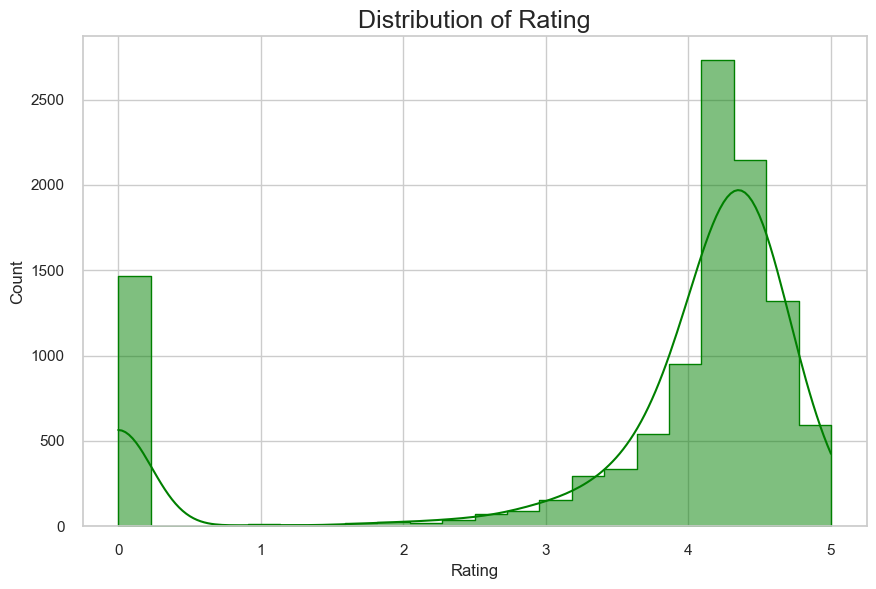

In [228]:
plt.figure(figsize=(8,5))
sns.histplot(data=g_apps['Rating'],kde=True,bins=22,color='green',element='step')
plt.title("Distribution of Rating",fontsize=18)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Rating',fontsize=12)
plt.show()

In [229]:
# checking datatype of Price column before evalutaion
g_apps['Price'].dtype

dtype('O')

# Finding Total Revenue

In [230]:
#before that remove '$' and make it in integer from object type
g_apps['Price']=g_apps['Price'].str.replace("$","")
g_apps['Price']=pd.to_numeric(g_apps['Price'])
t_rev=g_apps['Price'].sum()
print("Total revenue of all apps: ",t_rev)

Total revenue of all apps:  11133.2


# Top downloads category based

In [231]:
top_install=g_apps[['Installs','Category']].groupby('Category').sum('Installs').sort_values(by='Installs',ascending=False)[:10]
top_install

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452271905
FAMILY,10258203405
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


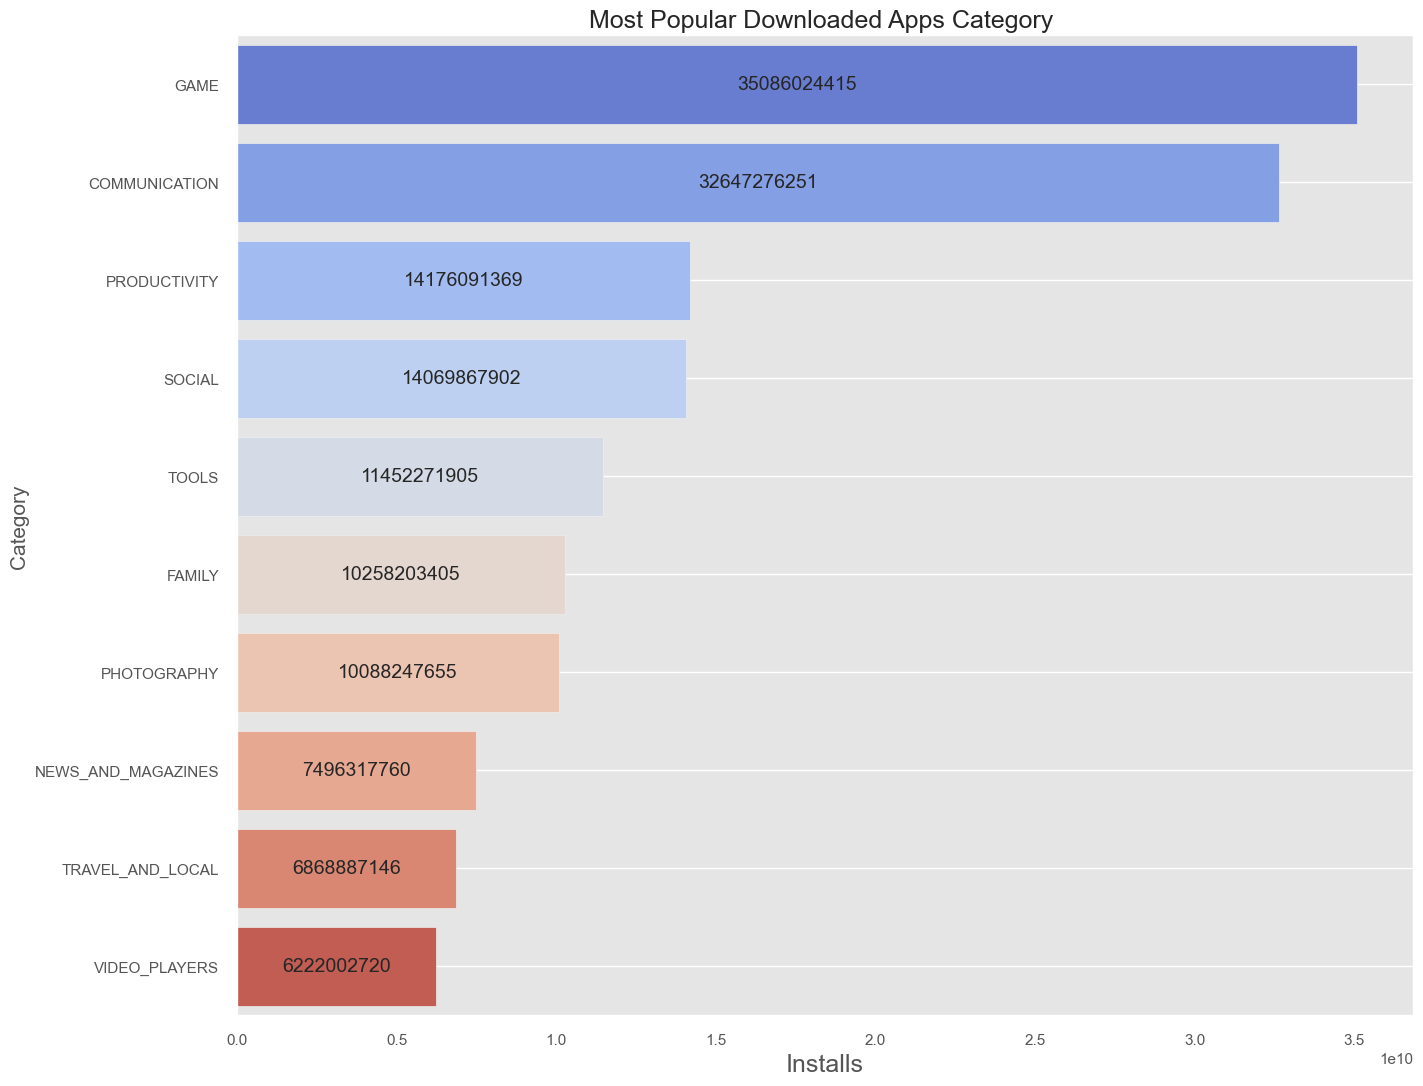

In [326]:
plt.figure(figsize=(12,10))
ax=sns.barplot(y=top_install.index,x=top_install.values.reshape(10),palette='coolwarm')
plt.grid(None)
ax.bar_label(ax.containers[0],fmt='%.f',label_type='center',fontsize=14)
plt.xlabel("Installs",fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel("Category",fontsize=15)
plt.title("Most Popular Downloaded Apps Category ",fontsize=18)
plt.show()


# App type(paid/free)

In [233]:
free_vs_p=g_apps[['Type']].groupby('Type').value_counts()
free_vs_p

Type
Free    10032
Paid      797
dtype: int64

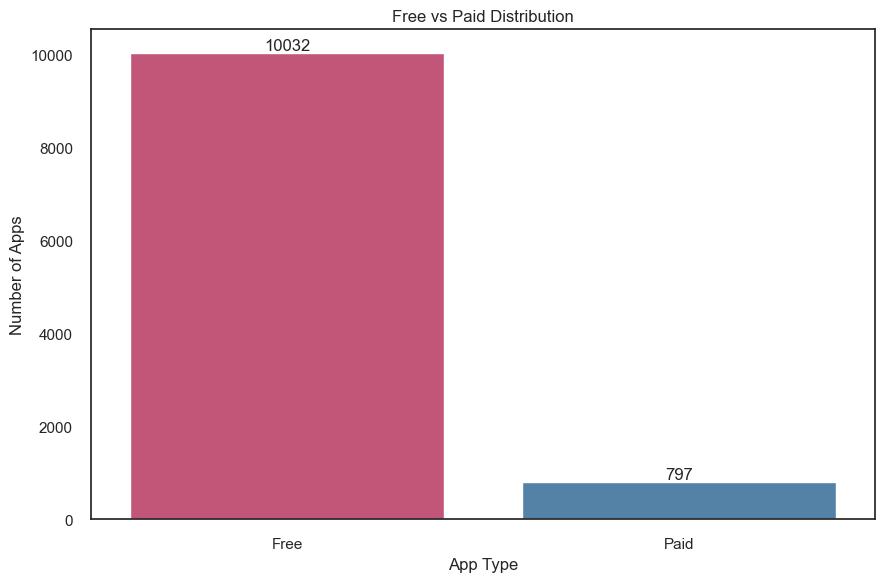

In [234]:
#plot showcasing the free_vs paid count
plt.figure(figsize=(8,5))
sns.set(style="white")
bars=sns.barplot(x=free_vs_p.index,y=free_vs_p.values,label='Free vs Paid',palette={'Free':'#d44473','Paid':'steelblue'})
plt.title('Free vs Paid Distribution')
plt.xlabel('App Type')
plt.ylabel("Number of Apps")
for bar in bars.patches:
    plt.text(x=bar.get_x()+bar.get_width() /2,y=bar.get_height(),ha="center",va="bottom",s=str(int(bar.get_height())))
plt.show()

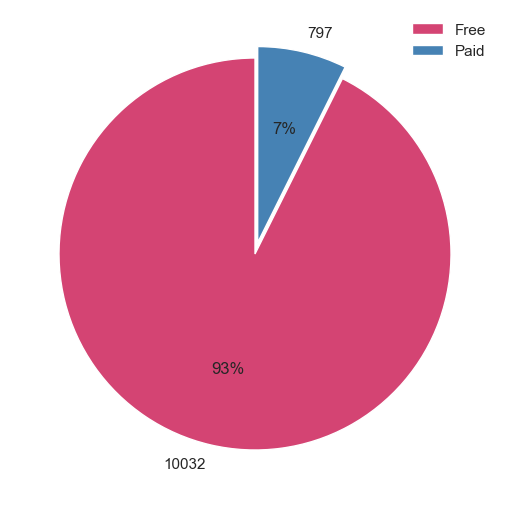

In [235]:
plt.figure(figsize=(9,5))
palette={'steelblue','#d44473'}
plt.pie(x=free_vs_p,labels=free_vs_p,colors=palette,autopct='%1.0f%%',explode={0,0.06},startangle=90,)
plt.legend(free_vs_p.index)
plt.show()

# App vs Downloads

In [236]:
# number of apps vs number of downloads highlighting first 10 throughing grouping apps
top10=g_apps[['App','Installs']].groupby('App').sum().sort_values(by='Installs',ascending=False)[:10]
top10

,Installs
App,
Subway Surfers,6000000000
Google News,4000000000
Google Photos,4000000000
Hangouts,4000000000
Google Drive,4000000000
Instagram,4000000000
Candy Crush Saga,3500000000
Temple Run 2,3000000000
Maps - Navigate & Explore,3000000000


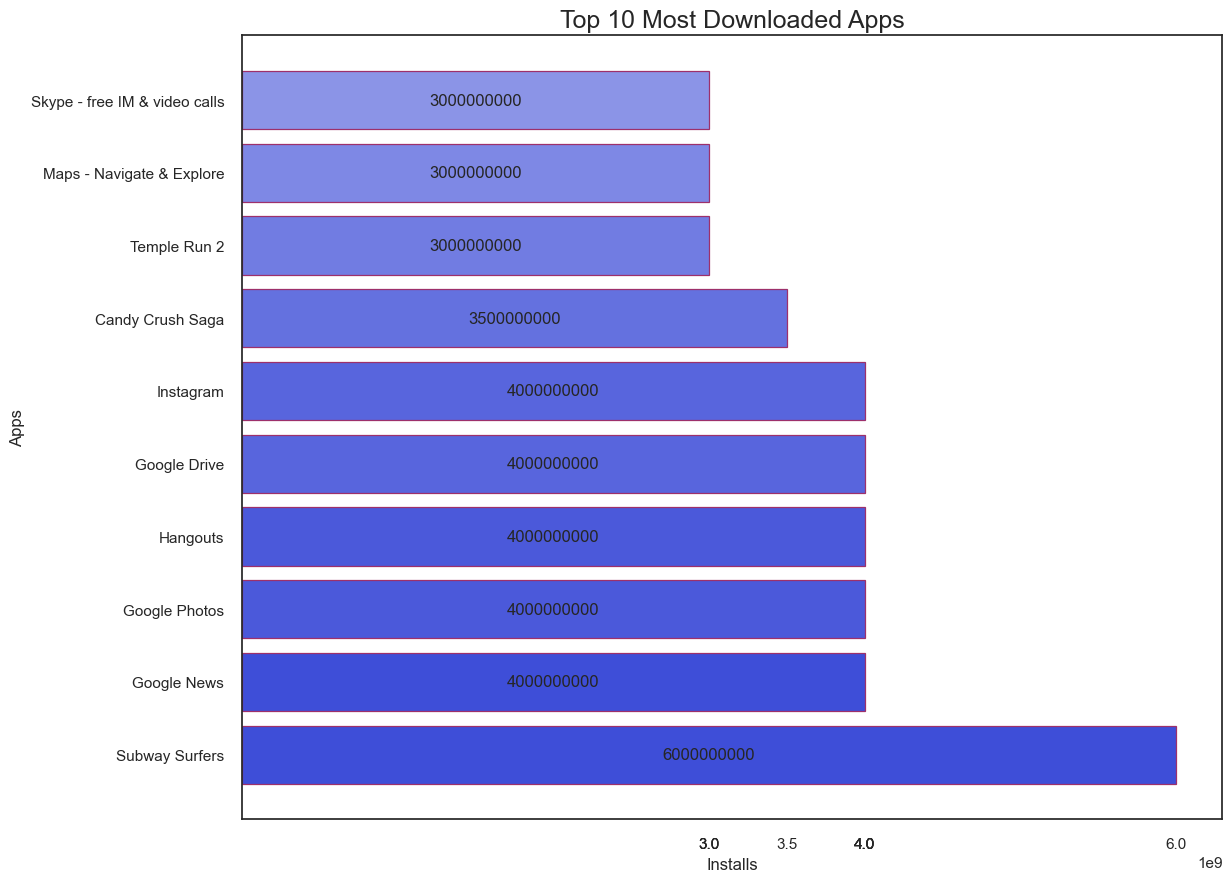

In [237]:
plt.figure(figsize=(10,8))
colors=['#3E4ED8','#3E4ED8','#4B59DA','#4B59DA','#5865DD','#5865DD','#6471DF','#717CE2','#7E88E5','#8B94E7']
bars=plt.barh(y=top10.index,width=top10['Installs'],color=colors,edgecolor='#9d306b',linewidth=0.9)
plt.style.use('tableau-colorblind10')
plt.title("Top 10 Most Downloaded Apps",fontsize=18)

plt.xlabel('Installs')
plt.xticks(top10.Installs)
plt.ylabel('Apps')
plt.bar_label(bars,fmt='%.f',label_type='center')
plt.show() 


# Top Preferred Genres

In [238]:
# remove anything after semicolon in Genre

g_apps['Genres']=g_apps['Genres'].str.split(";").str[1]
g_apps['Genres']




0                 NaN
1        Pretend Play
2                 NaN
3                 NaN
4          Creativity
             ...     
10836             NaN
10837             NaN
10838             NaN
10839             NaN
10840             NaN
Name: Genres, Length: 10829, dtype: object

In [241]:
#Most downloaded genre

top_d_gen=g_apps[['Installs','Genres']].groupby('Genres').sum().sort_values(by='Installs',ascending=False)
top_d_gen

,Installs
Genres,
Action & Adventure,2194016501
Education,878516320
Pretend Play,468024200
Music & Video,390711000
Brain Games,287304100
Creativity,92915600


In [248]:
top_d_gen.reset_index(inplace=True)

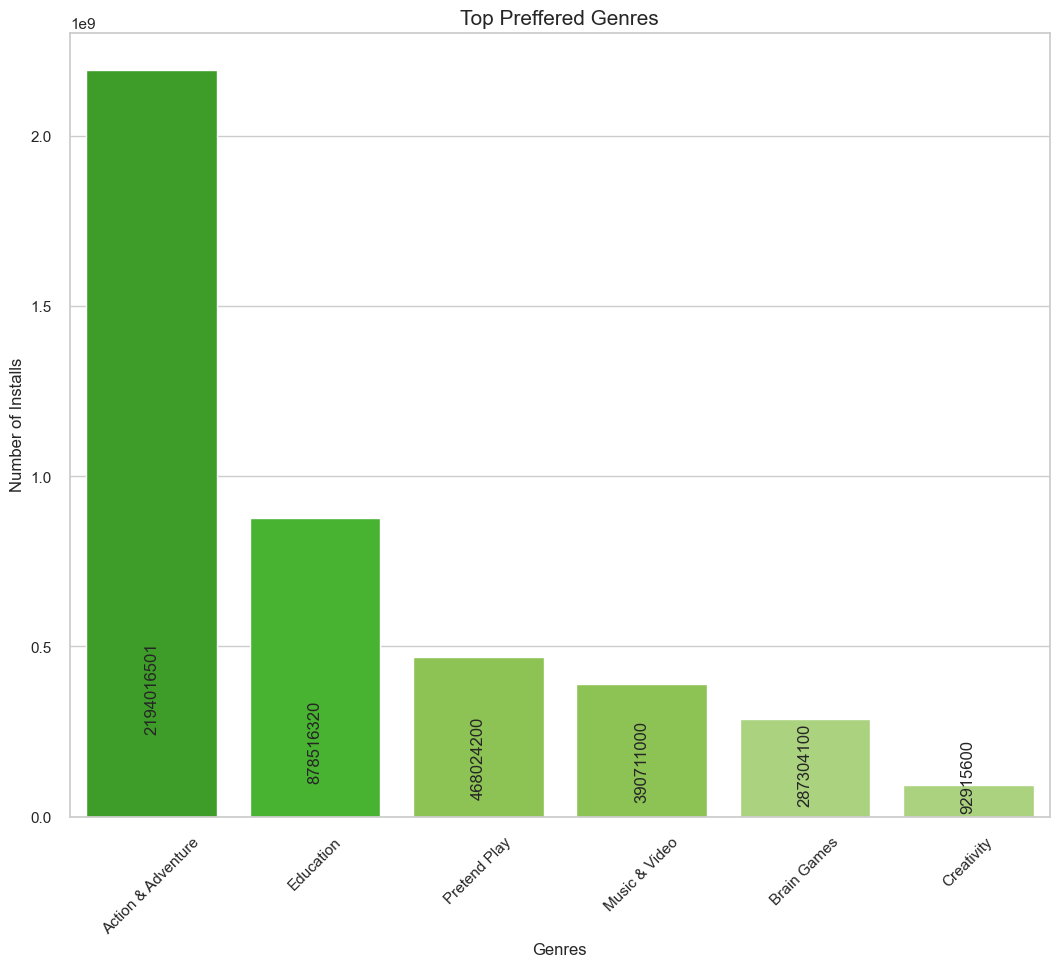

In [252]:
#plot representaion for the top 10 installed & preferred genres in Google Play Store
# reseting the index so that we have two columns of different data types & hence plotting is easy


plt.figure(figsize=(10,8))
sns.set(style='whitegrid')



bars=sns.barplot(x='Genres',y=top_d_gen['Installs'],data=top_d_gen,
                 palette={'Action & Adventure':'#31b015','Education':'#3ac71c','Pretend Play':'#8ed641','Music & Video':'#8ed641',
                          'Brain Games':'#aae071','Creativity':'#aae071'})
plt.xticks(top_d_gen.index,rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of Installs")
plt.title("Top Preffered Genres",fontsize=15)

for bar in bars.patches:
    plt.text(x=bar.get_x()+bar.get_width() /2,y=bar.get_height() - 0.89*bar.get_height(),ha="center",va="bottom",s=str(int(bar.get_height())),rotation=90)
plt.show()

In [253]:
# Timestamp
g_apps['Last Updated']

0        2018-01-07
1        2018-01-15
2        2018-08-01
3        2018-06-08
4        2018-06-20
            ...    
10836    2017-07-25
10837    2018-07-06
10838    2017-01-20
10839    2015-01-19
10840    2018-07-25
Name: Last Updated, Length: 10829, dtype: object

In [254]:
#split year and save to new column
g_apps['Year']=g_apps['Last Updated'].str.split("-").str[0]
g_apps['Year']=pd.to_numeric(g_apps['Year'])
g_apps['Year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Year, Length: 10829, dtype: int64

In [255]:
#Total downloads over time
tot_ins=g_apps[['Installs','Year']].groupby('Year').sum()
tot_ins

,Installs
Year,
2010,100000
2011,17407100
2012,13992210
2013,102191365
2014,269956226
2015,424541475
2016,1401495683
2017,4070943839
2018,161331228479


In [256]:
# recheck 
print(tot_ins[tot_ins.index==2010].sum())

Installs    100000
dtype: int64


<Figure size 800x550 with 0 Axes>

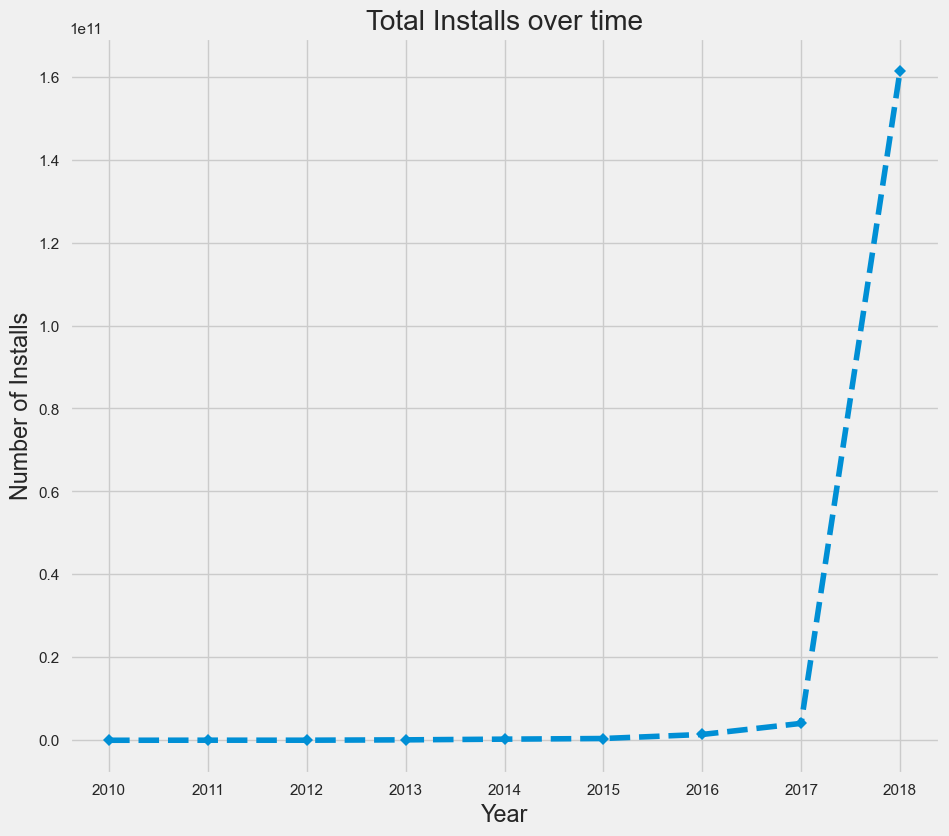

In [257]:
#plot to show the installs trend
tot_ins.index=tot_ins.index.astype(int) 
plt.set_cmap(cmap='Blues')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Number of Installs")
plt.title("Total Installs over time")
plt.plot(tot_ins.index, tot_ins.values, marker='D', linestyle='--')


plt.show()

In [258]:
#Downloads per size 
ins_size=g_apps.groupby("Size")['Installs'].sum()
ins_size

Size
1.0M                        157010
1.1M                       2390670
1.2M                      13599480
1.3M                      23827810
1.4M                      12779140
                          ...     
98M                      428152110
992k                           500
994k                          1000
99M                      835660050
Varies with device    102568200023
Name: Installs, Length: 457, dtype: int64

In [259]:
#resetting index so to fetch and next sort values
ins_size=ins_size.reset_index()
ins_size

,Size,Installs
0,1.0M,157010
1,1.1M,2390670
2,1.2M,13599480
3,1.3M,23827810
4,1.4M,12779140
...,...,...
452,98M,428152110
453,992k,500
454,994k,1000
455,99M,835660050


In [260]:
ins_size=ins_size.sort_values(by='Installs',ascending=False)[:10]
ins_size

,Size,Installs
456,Varies with device,102568200023
339,76M,6299110150
22,13M,4641252835
334,74M,3827110600
282,62M,3067551910
18,11M,2998662301
90,24M,2680532460
173,40M,1838817320
42,17M,1643005856
277,61M,1534722510


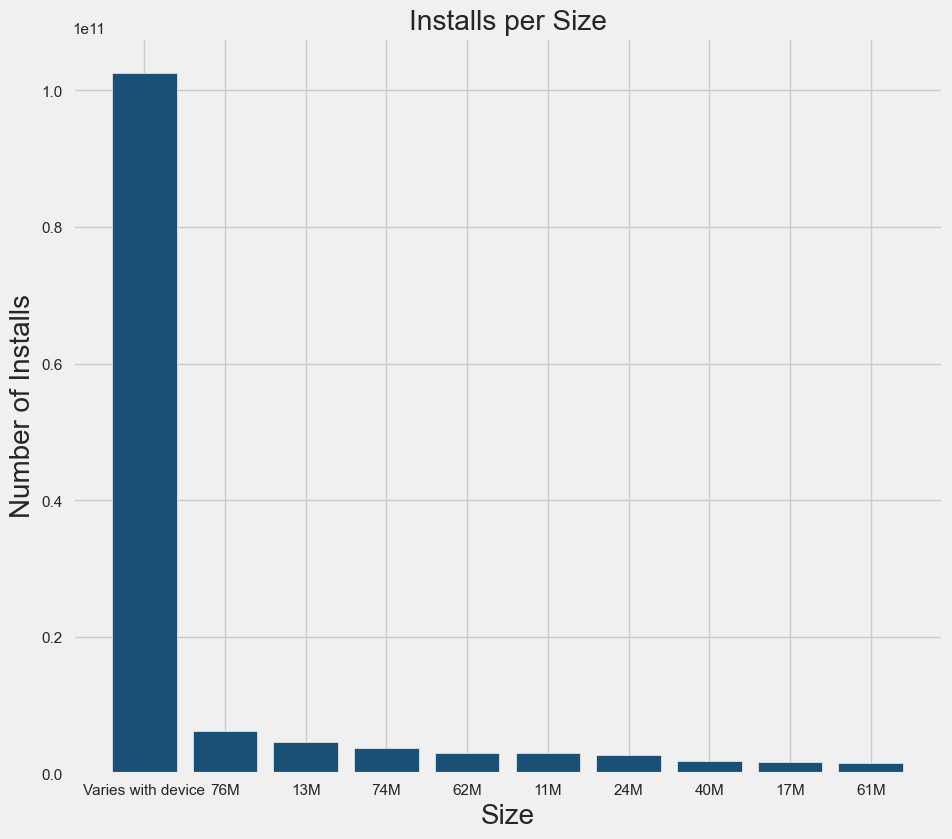

In [261]:
#display the top 10 doanloads with size
plt.figure(figsize=(10,8))
plt.style.use("_mpl-gallery")
plt.xlabel('Size',fontsize=20)
plt.ylabel("Number of Installs",fontsize=20)
plt.title("Installs per Size")
plt.bar(x=ins_size.Size,height=ins_size.Installs,color='#1a4f76')

plt.show()

In [262]:
#Highest revenue by category
rev_cat=g_apps[['Category','Price']].groupby('Category').sum().sort_values(by='Price',ascending=False)[:10]
rev_cat

,Price
Category,
FINANCE,2900.83
FAMILY,2433.79
LIFESTYLE,2360.87
MEDICAL,1439.96
GAME,287.30
TOOLS,266.26
PRODUCTIVITY,250.93
BUSINESS,185.27
PERSONALIZATION,152.47


In [263]:
# naming price as revenue
rev_cat.rename(columns={'Price':'Revenue'})

,Revenue
Category,
FINANCE,2900.83
FAMILY,2433.79
LIFESTYLE,2360.87
MEDICAL,1439.96
GAME,287.30
TOOLS,266.26
PRODUCTIVITY,250.93
BUSINESS,185.27
PERSONALIZATION,152.47


In [264]:
rev_cat=rev_cat.reset_index()

In [265]:
rev_cat.columns

Index(['Category', 'Price'], dtype='object')

Text(0.5, 1.0, 'Top Revenue based Category')

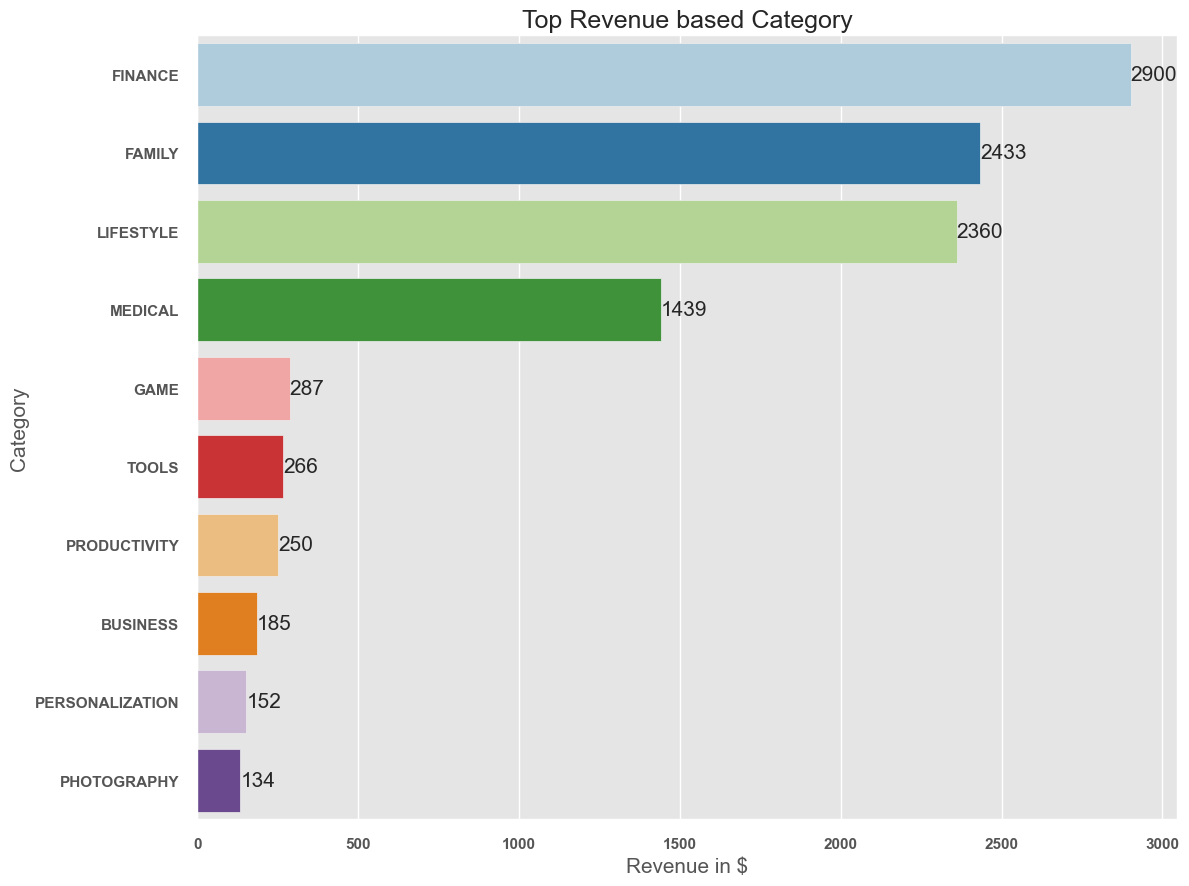

In [324]:
#plotting a graph
plt.figure(figsize=(10,8))
palette=sns.color_palette('Paired')
ax=sns.barplot(data=rev_cat,y='Category',x='Price',palette=palette)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.style.use("ggplot")
plt.ylabel('Category',fontsize=15)
plt.xlabel('Revenue in $',fontsize=15)
plt.bar_label(ax.containers[0],label_type='edge',fmt="%d",fontsize=15,fontweight='normal')
plt.title("Top Revenue based Category",fontsize=18)

In [267]:
#Highest Revenue based in year
rev_year2=g_apps[['Year','Price']].groupby(by='Year').sum().sort_values(by='Year',ascending=False)
rev_year2

,Price
Year,
2018,5972.50
2017,3690.22
2016,457.89
2015,610.64
2014,284.85
2013,101.35
2012,8.27
2011,7.48
2010,0.00


In [268]:
rev_year2=rev_year2.reset_index()
rev_year2

,Year,Price
0,2018,5972.50
1,2017,3690.22
2,2016,457.89
3,2015,610.64
4,2014,284.85
5,2013,101.35
6,2012,8.27
7,2011,7.48
8,2010,0.00


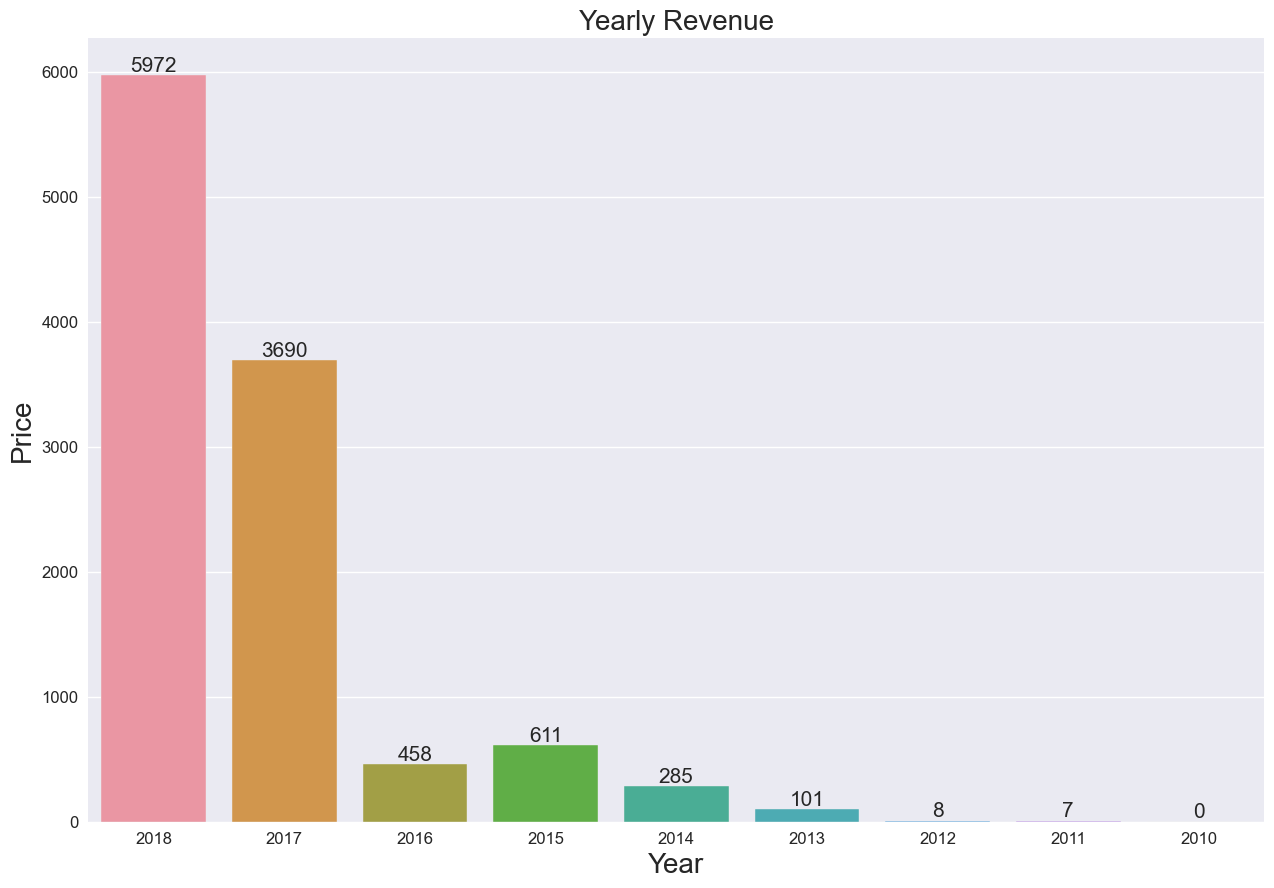

In [269]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12,8))
plt.xlabel("Year",fontsize=20)
plt.ylabel("Revenue",fontsize=20)
plt.title("Yearly Revenue",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax=sns.barplot(x=rev_year2['Year'], y=rev_year2['Price'],order=rev_year2['Year'])
ax.bar_label(ax.containers[0],fmt='%.f',label_type='edge',fontsize=15)


plt.show()

In [270]:
#converting all of them into percentage to find the percentage of all revenue yearly basis
per=[]
tot_sum=rev_year2.Price.sum()
tot_sum
for p in rev_year2['Price']:
    percentage=p/tot_sum*100
    per.append(percentage)
print(per)
print(per[:-4])
    
    

[53.64585204613228, 33.14608558186325, 4.112833686630977, 5.484856106061149, 2.5585635756116836, 0.9103402435957315, 0.07428232673445188, 0.06718643337045951, 0.0]
[53.64585204613228, 33.14608558186325, 4.112833686630977, 5.484856106061149, 2.5585635756116836]


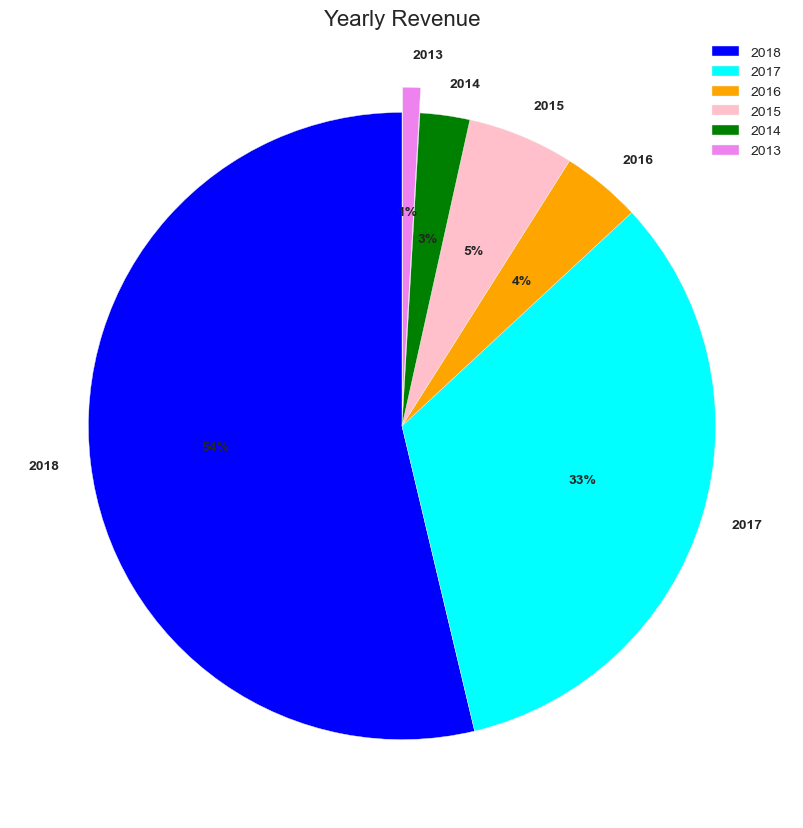

In [271]:
#visualization of revenue percenage yearly basis 

plt.figure(figsize=(15,8),edgecolor='black')
colors=['blue','aqua','orange','pink','green','violet','black','steelblue','gray','cyan']
explode = (0,0,0,0,0,0.08)

plt.pie(per[:-3],autopct='%.0f%%',startangle=90,explode=explode,labels=rev_year2['Year'][:-3],colors=colors,textprops={'weight':'bold'})
plt.legend(loc='upper right')
plt.title('Yearly Revenue',fontdict={'weight':'normal','size':'16'})

plt.show()

In [272]:
#Top revenue generating apps
top_rev_apps=g_apps[['App','Price']].groupby('App').sum().sort_values(by='Price',ascending=False)[:10]
top_rev_apps=top_rev_apps.rename(columns={'Price':'Revenue'})
top_rev_apps


,Revenue
App,
I'm Rich - Trump Edition,400.00
I am Rich Plus,399.99
I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
I AM RICH PRO PLUS,399.99
most expensive app (H),399.99
I am Rich,399.99
I Am Rich Pro,399.99
I am rich(premium),399.99
I Am Rich Premium,399.99


In [273]:
top_rev_apps=top_rev_apps.reset_index()
top_rev_apps

,App,Revenue
0,I'm Rich - Trump Edition,400.00
1,I am Rich Plus,399.99
2,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
3,I AM RICH PRO PLUS,399.99
4,most expensive app (H),399.99
5,I am Rich,399.99
6,I Am Rich Pro,399.99
7,I am rich(premium),399.99
8,I Am Rich Premium,399.99
9,I am Rich!,399.99


In [274]:
#pivot table
Highest_Revenue_Apps=pd.pivot_table(top_rev_apps,values='Revenue',index='App',aggfunc={'Revenue':'sum'})
print(Highest_Revenue_Apps)

                                   Revenue
App                                       
I AM RICH PRO PLUS                  399.99
I Am Rich Premium                   399.99
I Am Rich Pro                       399.99
I am Rich                           399.99
I am Rich Plus                      399.99
I am Rich!                          399.99
I am rich(premium)                  399.99
I'm Rich - Trump Edition            400.00
I'm Rich/Eu sou Rico/أنا غني/我很有錢   399.99
most expensive app (H)              399.99


In [275]:
#Customer rating by categroy

rating_cat=g_apps[['Category','Rating']].groupby('Category').mean().sort_values(by='Rating',ascending=False)[:10]
rating_cat

,Rating
Category,
EDUCATION,4.360897
ART_AND_DESIGN,4.171875
ENTERTAINMENT,4.126174
GAME,4.110227
COMICS,4.016667
PHOTOGRAPHY,3.966866
SHOPPING,3.899231
WEATHER,3.881707
SOCIAL,3.736271


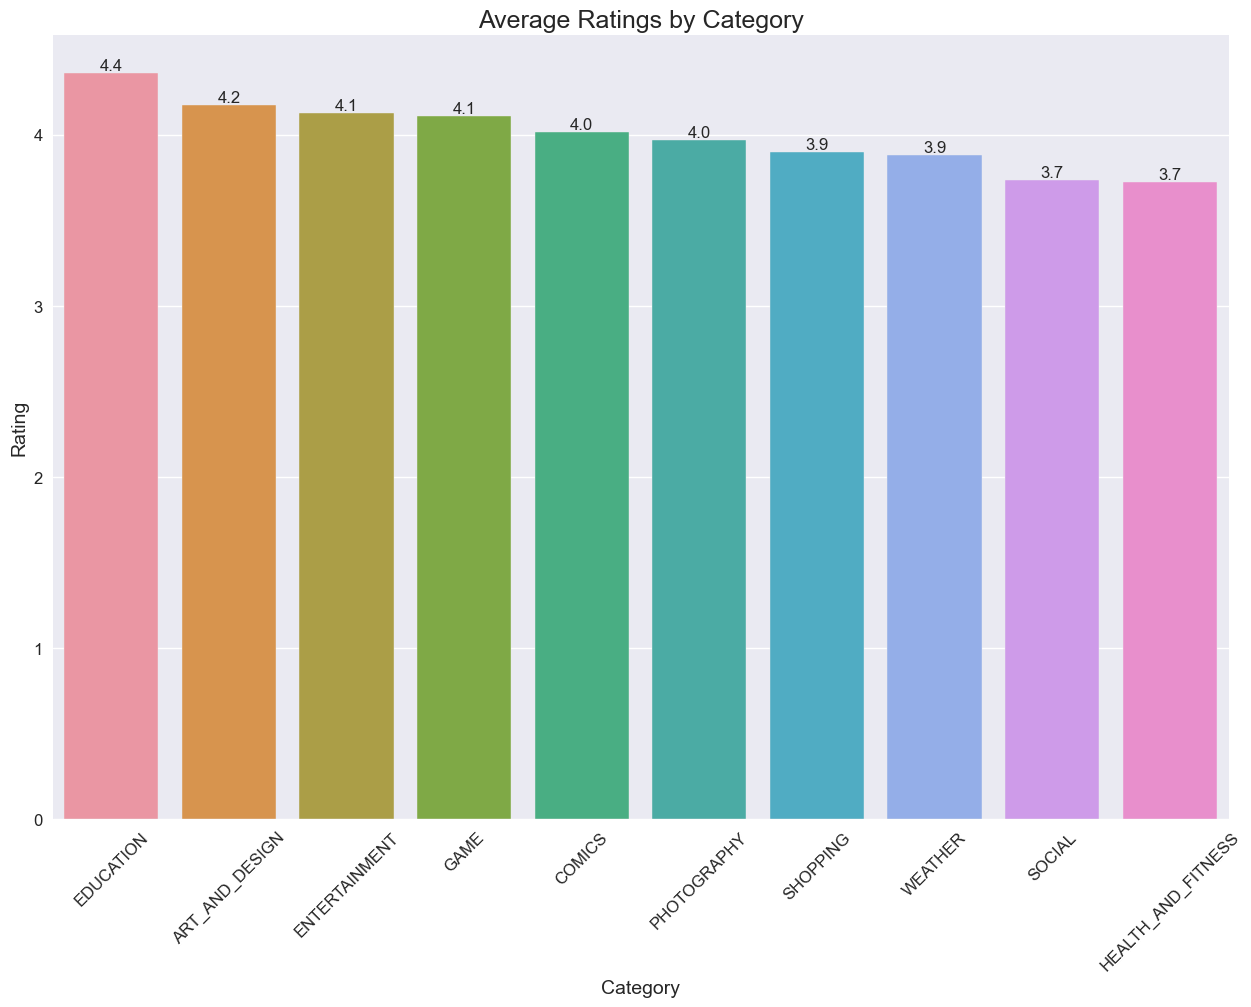

In [276]:
#plotting category based ratings through histplot
plt.figure(figsize=(12,8))
ax=sns.barplot(x=rating_cat.index,y=rating_cat['Rating'])
sns.set(style='whitegrid')
plt.xlabel('Category',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title("Average Ratings by Category",fontsize=18)
plt.yticks(fontsize=12)
plt.ylabel('Rating',fontsize=14)

for bar in ax.patches:
    plt.text(x=bar.get_x() + bar.get_width() / 2, y=bar.get_height(), 
             s=f'{bar.get_height():.1f}', ha='center', va='bottom')



plt.show()

# Rating vs Review 


In [306]:
rat_rev1 = g_apps.groupby('Rating')['Reviews'].sum()
rat_rev1=rat_rev1.reset_index()
rat_rev1

,Rating,Reviews
0,0.0,26571
1,1.0,28
2,1.2,44
3,1.4,98
4,1.5,61
5,1.6,691
6,1.7,2360
7,1.8,3418
8,1.9,3781
9,2.0,2997


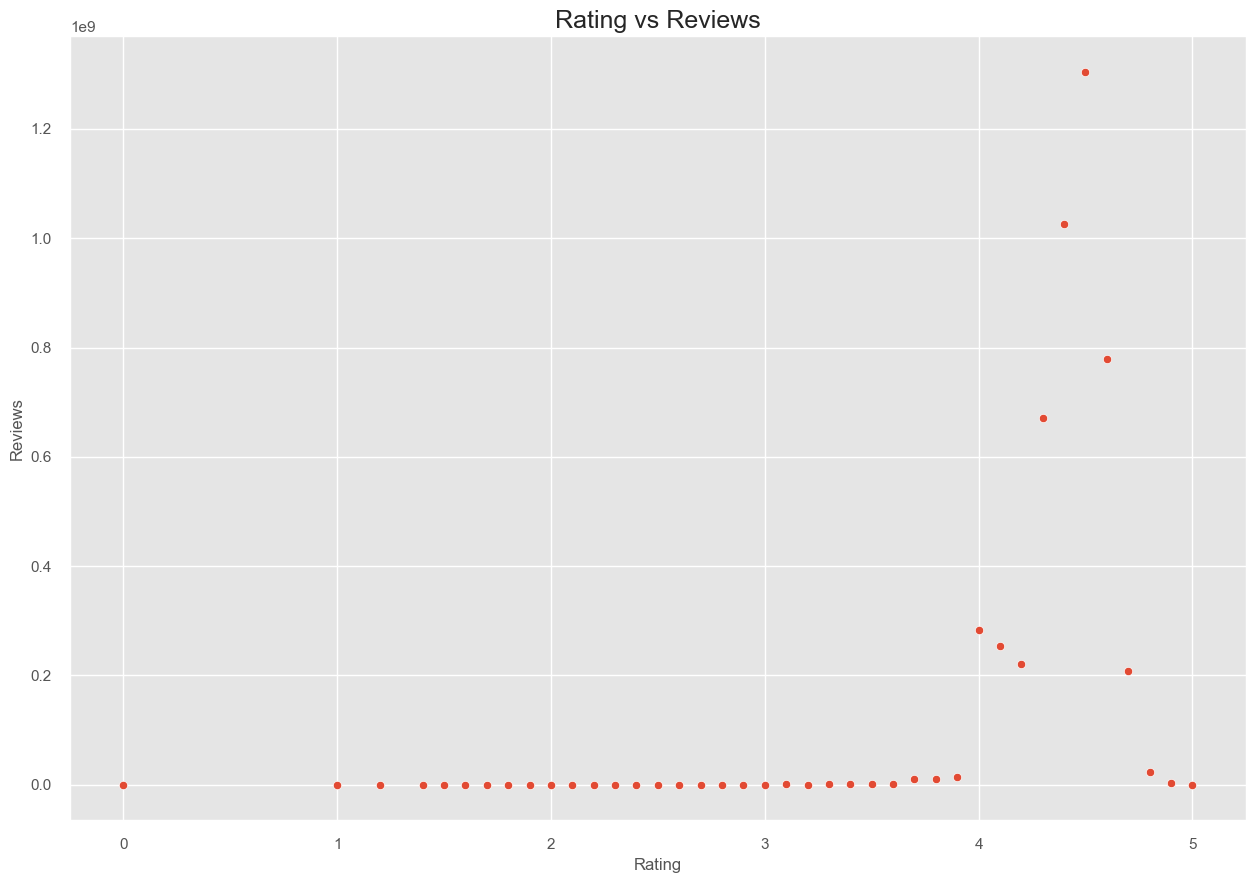

In [328]:
#plotting the corelation
plt.figure(figsize=(12,8))
sns.scatterplot(x='Rating',y='Reviews',data=rat_rev1,palette='red')
plt.title('Rating vs Reviews',fontsize=18)
plt.show()

# Average Rating based on its type('Free' vs 'Paid')

In [320]:
avgrat_type=g_apps.groupby('Type')['Rating'].mean()
avgrat_type

#not much difference in the Ratings given over Free or Paid Type Apps

Type
Free    3.636713
Paid    3.453074
Name: Rating, dtype: float64